In [12]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import time
from datetime import datetime
import matplotlib.pyplot as plt

#Get key values from config file
from config import consumer_key
from config import consumer_secret
from config import access_token
from config import access_token_secret

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)


In [13]:

#List of news outlets
news_outlets = ("@BBCNews", "@CBSNews", "@CNN",
                "@FoxNews", "@nytimes")

#Initialize master dataframe
master_df = pd.DataFrame()

#Loop through each news outlet and get tweets
for news_outlet in news_outlets:
    #Initialize largest id and counter
    largest_id = None
    tweet_counter = 0
    
    #Arrays to hold tweets, sentiments, counter
    tweet_text = []
    tweet_created = []
    tweets_ago = []
    compound = []
    pos = []
    neg = []
    neu = []
    
    #Be patient
    time.sleep(5)
    
    #Loop through pages of tweets
    for page in tweepy.Cursor(api.search, q=news_outlet, count=25, result_type = 'recent', max_id = largest_id).pages(4):

        if not largest_id:
            largest_id = page[0].id #this is the ID of the tweet
            
        #Loop through tweets on a page
        for tweet in page:
            #Set and increment counter
            tweets_ago.append(tweet_counter)
            tweet_counter +=1
            
            #Get tweet text
            tweet = tweet._json
            target_text = tweet['text']
            #Append to list
            tweet_text.append(target_text)
            
            #Get tweet created date time
            converted_datetime = datetime.strptime(tweet["created_at"], '%a %b %d %H:%M:%S +0000 %Y')
            #Convert and append to list
            tweet_created.append(converted_datetime.strftime('%Y-%d-%m %H:%M:%S'))

            #  Run Vader Analysis on each tweet and populate arrays
            vader = analyzer.polarity_scores(target_text)

            compound.append(vader["compound"])
            pos.append(vader["pos"])
            neu.append(vader["neu"])
            neg.append(vader["neg"])

    # Create dataframe with tweets and sentiment analyses
    df = pd.DataFrame({'source_account':news_outlet, 'text' :tweet_text, 'tweets_ago': tweets_ago, 'date' :tweet_created, 'compound':compound, 'pos':pos, 'neg':neg, 'neu':neu})
    #Add to master dataframe
    master_df = master_df.append(df)
    
    #Display master dataframe
    print(master_df)

        






    compound                 date    neg    neu    pos source_account  \
0    -0.4019  2018-29-03 04:12:30  0.130  0.870  0.000       @BBCNews   
1     0.4215  2018-29-03 04:11:39  0.000  0.865  0.135       @BBCNews   
2     0.0000  2018-29-03 04:11:32  0.000  1.000  0.000       @BBCNews   
3     0.3818  2018-29-03 04:11:13  0.000  0.885  0.115       @BBCNews   
4    -0.7096  2018-29-03 04:11:10  0.290  0.710  0.000       @BBCNews   
5     0.0000  2018-29-03 04:11:08  0.000  1.000  0.000       @BBCNews   
6     0.0000  2018-29-03 04:10:33  0.000  1.000  0.000       @BBCNews   
7     0.3400  2018-29-03 04:10:25  0.056  0.833  0.111       @BBCNews   
8     0.0000  2018-29-03 04:10:24  0.000  1.000  0.000       @BBCNews   
9     0.0000  2018-29-03 04:10:11  0.000  1.000  0.000       @BBCNews   
10    0.0000  2018-29-03 04:09:59  0.000  1.000  0.000       @BBCNews   
11   -0.1779  2018-29-03 04:09:51  0.133  0.763  0.104       @BBCNews   
12    0.4767  2018-29-03 04:09:48  0.077  0.737  0.

    compound                 date    neg    neu    pos source_account  \
0    -0.4019  2018-29-03 04:12:30  0.130  0.870  0.000       @BBCNews   
1     0.4215  2018-29-03 04:11:39  0.000  0.865  0.135       @BBCNews   
2     0.0000  2018-29-03 04:11:32  0.000  1.000  0.000       @BBCNews   
3     0.3818  2018-29-03 04:11:13  0.000  0.885  0.115       @BBCNews   
4    -0.7096  2018-29-03 04:11:10  0.290  0.710  0.000       @BBCNews   
5     0.0000  2018-29-03 04:11:08  0.000  1.000  0.000       @BBCNews   
6     0.0000  2018-29-03 04:10:33  0.000  1.000  0.000       @BBCNews   
7     0.3400  2018-29-03 04:10:25  0.056  0.833  0.111       @BBCNews   
8     0.0000  2018-29-03 04:10:24  0.000  1.000  0.000       @BBCNews   
9     0.0000  2018-29-03 04:10:11  0.000  1.000  0.000       @BBCNews   
10    0.0000  2018-29-03 04:09:59  0.000  1.000  0.000       @BBCNews   
11   -0.1779  2018-29-03 04:09:51  0.133  0.763  0.104       @BBCNews   
12    0.4767  2018-29-03 04:09:48  0.077  0.737  0.

    compound                 date    neg    neu    pos source_account  \
0    -0.4019  2018-29-03 04:12:30  0.130  0.870  0.000       @BBCNews   
1     0.4215  2018-29-03 04:11:39  0.000  0.865  0.135       @BBCNews   
2     0.0000  2018-29-03 04:11:32  0.000  1.000  0.000       @BBCNews   
3     0.3818  2018-29-03 04:11:13  0.000  0.885  0.115       @BBCNews   
4    -0.7096  2018-29-03 04:11:10  0.290  0.710  0.000       @BBCNews   
5     0.0000  2018-29-03 04:11:08  0.000  1.000  0.000       @BBCNews   
6     0.0000  2018-29-03 04:10:33  0.000  1.000  0.000       @BBCNews   
7     0.3400  2018-29-03 04:10:25  0.056  0.833  0.111       @BBCNews   
8     0.0000  2018-29-03 04:10:24  0.000  1.000  0.000       @BBCNews   
9     0.0000  2018-29-03 04:10:11  0.000  1.000  0.000       @BBCNews   
10    0.0000  2018-29-03 04:09:59  0.000  1.000  0.000       @BBCNews   
11   -0.1779  2018-29-03 04:09:51  0.133  0.763  0.104       @BBCNews   
12    0.4767  2018-29-03 04:09:48  0.077  0.737  0.

    compound                 date    neg    neu    pos source_account  \
0    -0.4019  2018-29-03 04:12:30  0.130  0.870  0.000       @BBCNews   
1     0.4215  2018-29-03 04:11:39  0.000  0.865  0.135       @BBCNews   
2     0.0000  2018-29-03 04:11:32  0.000  1.000  0.000       @BBCNews   
3     0.3818  2018-29-03 04:11:13  0.000  0.885  0.115       @BBCNews   
4    -0.7096  2018-29-03 04:11:10  0.290  0.710  0.000       @BBCNews   
5     0.0000  2018-29-03 04:11:08  0.000  1.000  0.000       @BBCNews   
6     0.0000  2018-29-03 04:10:33  0.000  1.000  0.000       @BBCNews   
7     0.3400  2018-29-03 04:10:25  0.056  0.833  0.111       @BBCNews   
8     0.0000  2018-29-03 04:10:24  0.000  1.000  0.000       @BBCNews   
9     0.0000  2018-29-03 04:10:11  0.000  1.000  0.000       @BBCNews   
10    0.0000  2018-29-03 04:09:59  0.000  1.000  0.000       @BBCNews   
11   -0.1779  2018-29-03 04:09:51  0.133  0.763  0.104       @BBCNews   
12    0.4767  2018-29-03 04:09:48  0.077  0.737  0.

    compound                 date    neg    neu    pos source_account  \
0    -0.4019  2018-29-03 04:12:30  0.130  0.870  0.000       @BBCNews   
1     0.4215  2018-29-03 04:11:39  0.000  0.865  0.135       @BBCNews   
2     0.0000  2018-29-03 04:11:32  0.000  1.000  0.000       @BBCNews   
3     0.3818  2018-29-03 04:11:13  0.000  0.885  0.115       @BBCNews   
4    -0.7096  2018-29-03 04:11:10  0.290  0.710  0.000       @BBCNews   
5     0.0000  2018-29-03 04:11:08  0.000  1.000  0.000       @BBCNews   
6     0.0000  2018-29-03 04:10:33  0.000  1.000  0.000       @BBCNews   
7     0.3400  2018-29-03 04:10:25  0.056  0.833  0.111       @BBCNews   
8     0.0000  2018-29-03 04:10:24  0.000  1.000  0.000       @BBCNews   
9     0.0000  2018-29-03 04:10:11  0.000  1.000  0.000       @BBCNews   
10    0.0000  2018-29-03 04:09:59  0.000  1.000  0.000       @BBCNews   
11   -0.1779  2018-29-03 04:09:51  0.133  0.763  0.104       @BBCNews   
12    0.4767  2018-29-03 04:09:48  0.077  0.737  0.

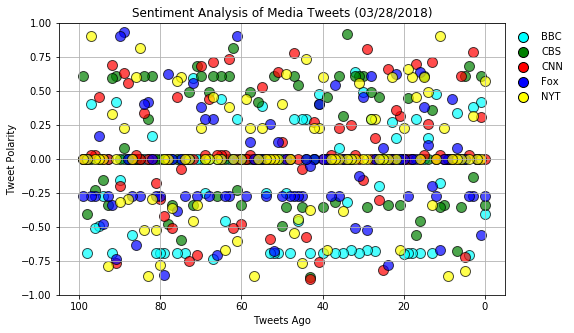

In [21]:
#Group by news outlet
grouped = master_df.groupby('source_account')

#Get data for BBC
BBC_x_axis = grouped.get_group('@BBCNews')['tweets_ago'].tolist()
BBC_data = grouped.get_group('@BBCNews')['compound'].tolist()

#Get data for CBS
CBS_x_axis = grouped.get_group('@CBSNews')['tweets_ago'].tolist()
CBS_data = grouped.get_group('@CBSNews')['compound'].tolist()

#Get data for CNN
CNN_x_axis = grouped.get_group('@CNN')['tweets_ago'].tolist()
CNN_data = grouped.get_group('@CNN')['compound'].tolist()

#Get data for FOX
FOX_x_axis = grouped.get_group('@FoxNews')['tweets_ago'].tolist()
FOX_data = grouped.get_group('@FoxNews')['compound'].tolist()

#Get data for NYT
NYT_x_axis = grouped.get_group('@nytimes')['tweets_ago'].tolist()
NYT_data = grouped.get_group('@nytimes')['compound'].tolist()

#Create scatter plots
BBC_scatter = plt.scatter(BBC_x_axis, BBC_data, marker="o", facecolor="cyan", edgecolor='black', linewidth='1', s=100, alpha=0.7)
CBS_scatter = plt.scatter(CBS_x_axis, CBS_data, marker="o", facecolor="green", edgecolor='black', linewidth='1', s=100, alpha=0.7)
CNN_scatter = plt.scatter(CNN_x_axis, CNN_data, marker="o", facecolor="red", edgecolor='black', linewidth='1', s=100, alpha=0.7)
FOX_scatter = plt.scatter(FOX_x_axis, FOX_data, marker="o", facecolor="blue", edgecolor='black', linewidth='1', s=100, alpha=0.7)
NYT_scatter = plt.scatter(NYT_x_axis, NYT_data, marker="o", facecolor="yellow", edgecolor='black', linewidth='1', s=100, alpha=0.7)

#Format plot
plt.grid()
plt.ylim(-1, 1)
plt.xlim(105,-5)
plt.title("Sentiment Analysis of Media Tweets (03/28/2018)")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

#Add Legend
D_id_color = {'BBC': u'cyan', 'CBS': u'green', 'CNN': u'red', 'Fox': u'blue', 'NYT': u'yellow'}
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='', markeredgecolor='black', markersize=10) for color in D_id_color.values()]
plt.legend(markers, D_id_color.keys(), numpoints=1, bbox_to_anchor=(1.15,1), loc="upper right", frameon = False)

#Set figure size
fig = plt.gcf()
fig.set_size_inches(8, 5, forward=True)


#Save figure
fig.savefig('News_Sentiment_Analysis.png', dpi=100)

#Show plot
plt.show()


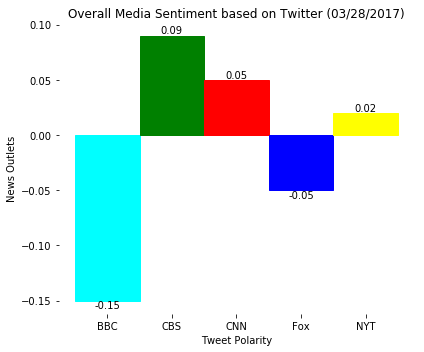

In [15]:
#Get mean of sentiment compound by news outlet and add to list
news_outlet_average = []

news_outlet_average.append(round(np.mean(grouped.get_group('@BBCNews')['compound']),2))
news_outlet_average.append(round(np.mean(grouped.get_group('@CBSNews')['compound']),2))
news_outlet_average.append(round(np.mean(grouped.get_group('@CNN')['compound']),2))
news_outlet_average.append(round(np.mean(grouped.get_group('@FoxNews')['compound']),2))
news_outlet_average.append(round(np.mean(grouped.get_group('@nytimes')['compound']),2))

news_outlet_names = ['BBC', 'CBS', 'CNN', 'Fox', 'NYT']

#Plot bar chart
barlist = plt.bar(news_outlet_names, news_outlet_average, width=1.0, linestyle=None)

#Format chart
plt.xlabel("Tweet Polarity")
plt.ylabel("News Outlets")
plt.title("Overall Media Sentiment based on Twitter (03/28/2017)")

#Set bar colors
barlist[0].set_color('cyan')
barlist[1].set_color('green')
barlist[2].set_color('red')
barlist[3].set_color('blue')
barlist[4].set_color('yellow')

#Display values for bars 
for a,b in zip(news_outlet_names, news_outlet_average):
    if b>0:
        plt.text(a, b, str(b), ha='center', va='bottom')
    else:
        plt.text(a, b, str(b), ha='center', va='top')

#Add horizontal line for 0
#plt.axhline(y=0, color='black', linestyle='-')

#Set figure size
fig = plt.gcf()
fig.set_size_inches(6, 5, forward=True)


for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.tight_layout()

#Save figure
fig.savefig('News_Overall_Sentiment_Analysis.png', dpi=100)


plt.show()
